#### Plans
Look at if the lowest or highest values are within 95% confidence interval 
    add the upper and lower bounds to the line plot  
    look at entire data set?  
    overall mean of ratings minus mean of 2005
    is the difference significant?
    hypothesis of the means being the same value
        shift the means so that they are equal?
Think of other hypothesis tests that can be performed  
Dont make it too long    



look at distribution of 1, 2, 3, 4,5 ratings for the best year, worst year, most recent year, and overall?
    calculate the difference in proportions?
    calculate overall proportion of entire dataset
    is this different from the yearly proportions observed? statisticall significant?
    1 vs all? or all separate? for proportions.

# Capstone Project 2: Recommender System

## Deeper Analysis
In the exploratory data analysis part of the project, it was seen that the yearly average ratings had some interesting movements. The cleaned Amazon data set will be imported as before and the yearly average ratings plots will be created again. A deeper analysis of the plot will be performed to see if some insights can be drawn from it.  

It was also seen that in the three plots of yearly amount of ratings, yearly amount of unique items, and yearly amount of unique reviewers there was a spike that was observed between the years of 2007 to 2008. This phenomenon will also be given an in-depth look. 

### Average Yearly Ratings
To create the yearly average ratings plot again the necessary packages and modules will be imported and the cleaned Amazon dataset will be read into a pandas DataFrame.

In [1]:
#importing relevant packages and modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting default plot settings
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.3)

In [3]:
#accessing the local directory for the data
PATH = os.path.join(os.environ['HOMEPATH'], 'data', 'amazon_cleaned.csv')
df = pd.read_csv(PATH, index_col=0)

C:\Users\Thompson\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
#checking to see that reading the data was successful
df.head()

,itemID,rating,reviewText,reviewTime,reviewerID,summary,foundHelpful,totalHelpful
0,0528881469,5,We got this GPS for my husband who is an (OTR)...,2013-06-02,AO94DHGC771SJ,Gotta have GPS!,0,0
1,0528881469,1,"I'm a professional OTR truck driver, and I bou...",2010-11-25,AMO214LNFCEI4,Very Disappointed,12,15
2,0528881469,3,"Well, what can I say. I've had this unit in m...",2010-09-09,A3N7T0DY83Y4IG,1st impression,43,45
3,0528881469,2,"Not going to write a long review, even thought...",2010-11-24,A1H8PY3QHMQQA0,"Great grafics, POOR GPS",9,10
4,0528881469,1,I've had mine for a year and here's what we go...,2011-09-29,A24EV6RXELQZ63,"Major issues, only excuses for support",0,0


A subset of the data containing only the reiviewTime and the rating columns will be created. The reviewTime column will be set as the index and converted to a datetime data type. Since the dataset ends in July 2014, the data points for year of 2014 will be filtered out because that year is incomplete. Then the subset will be resampled yearly with an aggregation on the average ratings. This yearly dataset will be plotted in order to recreate the yearly average ratings plot.

In [57]:
#looking at only reviewTime and rating, setting reviewTime as a datetime index
df_time_rating = df[['reviewTime', 'rating']].set_index('reviewTime')
df_time_rating.index = pd.to_datetime(df_time_rating.index)

#filtering out the year of 2014
df_time_rating = df_time_rating[(df_time_rating.index < '2014') & (df_time_rating.index > '2000')]

#resampled by average ratings yearly
yearly_ratings = df_time_rating.resample('1y').mean()

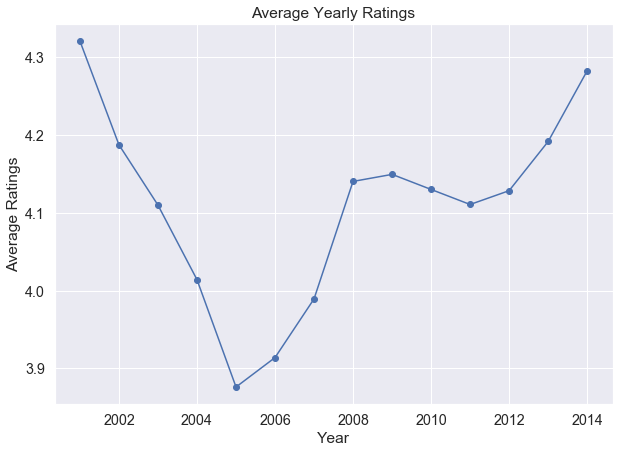

In [58]:
#plot the yearly averages
plt.title('Average Yearly Ratings')
plt.xlabel('Year')
plt.ylabel('Average Ratings')

plt.plot(yearly_ratings, marker='o')
plt.show()

As it was stated before, it can be seen that there is a steep drop in average ratings with the all time low in 2005. Taking a look at the proportions of ratings each year may show some interesting observations. To do this, the count of each rating will be taken for each year. For each rating and for each year, the count for that rating will be divided by the total count of the other ratings in order to obtain the yearly proportions. A for loop will be used in order to calculate the proportion of each rating and plot them all on the same figure.

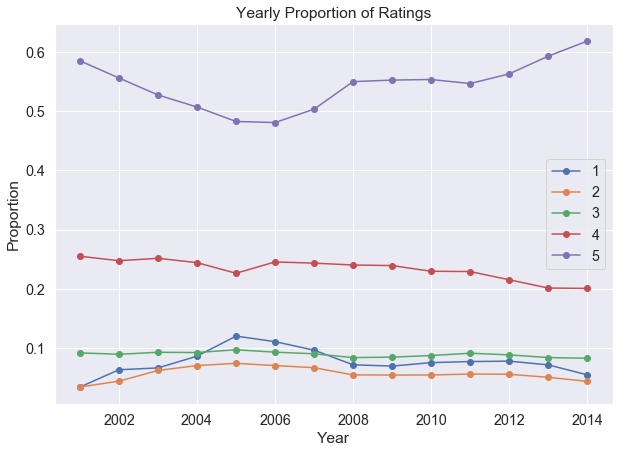

In [59]:
#list of ratings to loop through
ratings = [1,2,3,4,5]

for rating in ratings:
    #filtering by the current rating in the loop
    rating_filter = df_time_rating[df_time_rating.rating == rating]
    #filtering by all other ratings
    rating_other = df_time_rating[df_time_rating.rating != rating]
    
    #resampling by the count of the rating per year
    yearly_ratings_count = rating_filter.resample('1y').count()
    #resampling by the count of the other ratings per year
    yearly_ratings_count_other = rating_other.resample('1y').count()
    #calculating the proportion of the rating: count/(total count)
    yearly_proportions = yearly_ratings_count/(yearly_ratings_count_other + yearly_ratings_count)
    #plotting for each rating
    plt.plot(yearly_proportions, marker='o', label=rating)


plt.title('Yearly Proportion of Ratings')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.show()

This plot shows that after the initial year of 2000, the proportion of ratings for 2, 3, and 4 remain relatively stable. However, the ratings of 1 and 5 appear to be a bit more dynamic. It is seen that the proportion of ratings that are 5 decreases until the years of 2005 and 2006. At the same time, the proportion of ratings that are 1 increases and peaks at the year of 2005. This along with the slight decrease for the proportion of 4 in 2005 matches what is seen in the original average yearly ratings plot. From this plot it can be observed that the major movements in the yearly average ratings are mainly due to the proportion of ratings for 5 and 1 along with a gradual change in the proportion of ratings that are 4.

In [60]:
#look at hypothesis test? is the high or low outside confidence interval?
#no, need to move on so that I can get to the recommender system
#put this as a something else I could look into a bit more
#Next, look at the 2007-2008 phenomenon


In [61]:
#Exploring

In [62]:
yearly_counts = df_time_rating.resample('1y').count()

In [63]:
yearly_counts

,rating
reviewTime,
2000-12-31,816
2001-12-31,1609
2002-12-31,2315
2003-12-31,3547
2004-12-31,5159
2005-12-31,9638
2006-12-31,15447
2007-12-31,35976
2008-12-31,49872


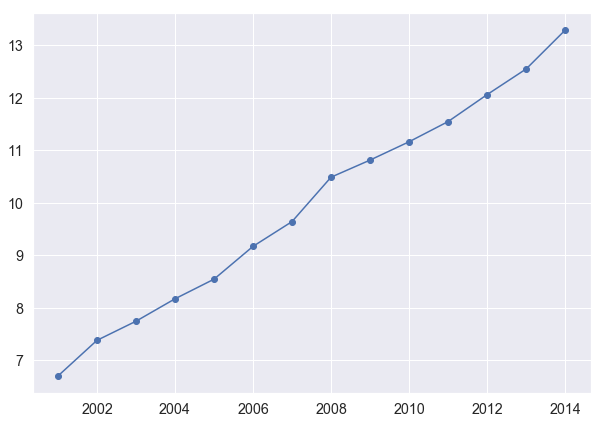

In [64]:
plt.plot(yearly_counts.index, np.log(yearly_counts.rating), marker='o')
plt.show()

In [65]:
#might not be explanable by just looking at the data
#perhaps a there was a good promotion that increased the growth
#do not pursue? just look at hypothesis test for the average yearly ratings?
#not only count of ratings increased, but also proportion of ratings that were 5 went up
#can i break up the count of yearly ratings into something smaller that can be observed?
#something that may show why it spiked up in 2007-2008?
#if not, what else can i saw about the growth?
#what else could it indicate? What can it show? what does it mean?
#can I group up all the counts?
#I could fit a linear regression line to it and make forcast the growth of the years


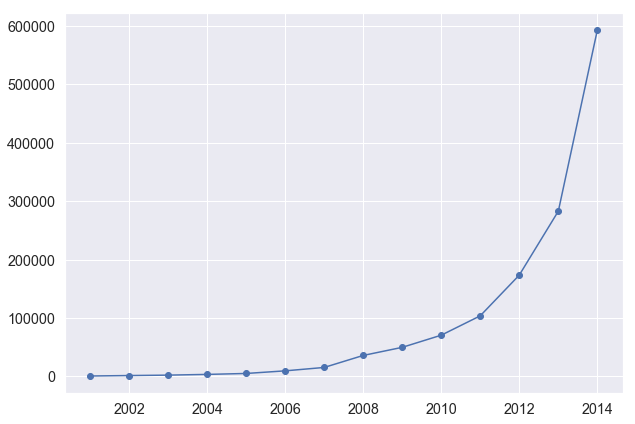

In [66]:
plt.plot(yearly_counts, marker='o')
plt.show()

In [67]:
from sklearn.linear_model import LinearRegression

In [112]:
lin = LinearRegression()
X = np.array(yearly_counts.index.year).reshape(-1,1)
#np.array(yearly_counts.index).reshape(-1,1)
y = np.log(yearly_counts.rating)
lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
y_pred = lin.predict(X)

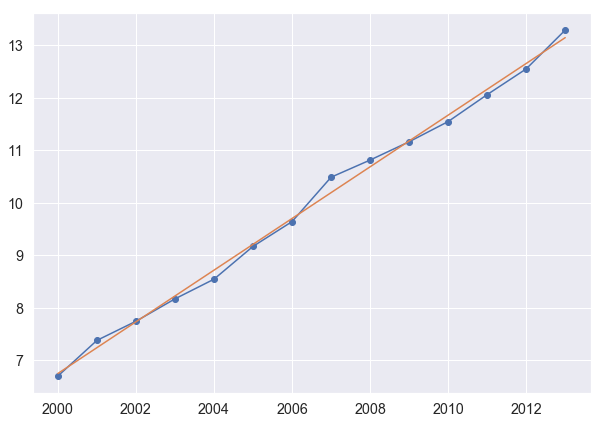

In [114]:
plt.plot(yearly_counts.index.year, np.log(yearly_counts.rating), marker='o')
plt.plot(X, y_pred)
plt.show()

In [120]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y, y_pred)
score

0.015661439712533885

In [127]:
lin.predict([[2014],[2015],[2016],[2017]])


array([13.64050918, 14.13249587, 14.62448256, 15.11646925])

In [128]:
np.exp(lin.predict([[2014],[2015],[2016],[2017]]))

array([ 839455.86098497, 1372982.40327583, 2245598.33020048,
       3672816.08895182])